# Part 1: Text Processing and Exploratory Data Analysis

## 1. Data Preparation

In [139]:
#pip install nltk (in case you do not have nltk)
import nltk
import json
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [140]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
#We load the products info in a dataframe
products_path = '../../data/fashion_products_dataset.json'
with open(products_path, "r", encoding="utf-8") as f:
    products = pd.read_json(products_path)

display(products.head())

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Women Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


## 1.1. Pre-Processing text

In [142]:
#We create a function to pre-process a line
def build_terms(line):
    """
    Preprocess a line:
    ●  Removing stop words 
    ●  Tokenization 
    ●  Removing punctuation marks 
    ●  Stemming 
    ●  Transforming to lowercase

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    line = line.lower()
    line = line.split()
    line = [x for x in line if x not in stop_words]
    line = [stemmer.stem(word) for word in line]
    return line

## 1.2. Information to return when doing a search 

In [ ]:
def get_products_information(products_df):
    elements = ["_id", "title", "description", "brand", "category", "sub_category", 
                "product_details", "seller", "out_of_stock", "selling_price", 
                "discount", "actual_price", "average_rating", "url"]
    
    products_df = products_df[elements]
    
    return products_df

In [144]:
products = get_products_information(products)

products["processed_title"] = products["title"].apply(build_terms)
products["processed_description"] = products["description"].apply(build_terms)

In [145]:
display(products.head(5))

,_id,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url,processed_title,processed_description
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, women, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
1,893e6980-f2a0-531f-b056-34dd63fe912c,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499,66% off,"1,499",3.9,https://www.flipkart.com/yorker-solid-men-blue...,"[solid, men, blue, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, men, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,False,911,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, women, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"Solid Women Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,False,943,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-brow...,"[solid, women, brown,, grey, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."


## Formatting to int the numeric values and the discount

In [146]:
def safe_to_float(x):
    try:
        x = str(x).replace(',', '').strip()
        return float(x) if x != '' else np.nan
    except:
        return np.nan

columns_to_float = ["selling_price", "actual_price"]
for col in columns_to_float:
    products[col] = products[col].apply(safe_to_float)

def safe_discount_to_float(x):
    try:
        x = str(x).replace('% off', '').replace('%', '').strip()
        return float(x) if x != '' else np.nan
    except:
        return np.nan

products['discount'] = products['discount'].apply(safe_discount_to_float)

display(products.head(5))

,_id,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url,processed_title,processed_description
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921.0,69.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, women, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
1,893e6980-f2a0-531f-b056-34dd63fe912c,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499.0,66.0,1499.0,3.9,https://www.flipkart.com/yorker-solid-men-blue...,"[solid, men, blue, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931.0,68.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, men, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,False,911.0,69.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, women, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"Solid Women Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,False,943.0,68.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-brow...,"[solid, women, brown,, grey, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."


## 1.3. Handle of category, sub_category, brand, product_details, and seller during pre-processing. 

In [147]:
# We join the category and sub_category into a single field
products['cat_subcat'] = products['category'] + ": " + products['sub_category']
display(products)

,_id,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url,processed_title,processed_description,cat_subcat
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921.0,69.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, women, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co...",Clothing and Accessories: Bottomwear
1,893e6980-f2a0-531f-b056-34dd63fe912c,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499.0,66.0,1499.0,3.9,https://www.flipkart.com/yorker-solid-men-blue...,"[solid, men, blue, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co...",Clothing and Accessories: Bottomwear
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931.0,68.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, men, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co...",Clothing and Accessories: Bottomwear
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,False,911.0,69.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, women, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co...",Clothing and Accessories: Bottomwear
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"Solid Women Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,False,943.0,68.0,2999.0,3.9,https://www.flipkart.com/yorker-solid-men-brow...,"[solid, women, brown,, grey, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co...",Clothing and Accessories: Bottomwear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28075,3705c6bd-6f23-529a-9b64-15b8fc568efa,Sleeveless Solid Men Jacket,,Oka,Clothing and Accessories,Winter Wear,"[{'Color': 'Blue'}, {'Fabric': 'Nylon'}, {'Pat...",,True,1379.0,40.0,2299.0,,https://www.flipkart.com/okane-sleeveless-soli...,"[sleeveless, solid, men, jacket]",[],Clothing and Accessories: Winter Wear
28076,f2a683e4-634d-5a11-8950-2d56b924576d,Printed Men Blue Regular Shorts,,Oka,Clothing and Accessories,Bottomwear,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Printe...",OKANE,False,520.0,34.0,799.0,3.8,https://www.flipkart.com/okane-printed-men-blu...,"[print, men, blue, regular, short]",[],Clothing and Accessories: Bottomwear
28077,1efa858c-1360-59a6-9624-bb04eddb492c,Checkered Single Breasted Casual Women Full Sl...,,Oka,Clothing and Accessories,"Blazers, Waistcoats and Suits","[{'Color': 'Grey'}, {'Fabric': 'Tweed'}, {'Pat...",,True,2999.0,40.0,4999.0,,https://www.flipkart.com/okane-checkered-singl...,"[checker, singl, breast, casual, women, full, ...",[],"Clothing and Accessories: Blazers, Waistcoats ..."
28078,9fdfdd22-487b-599b-8be6-5dd00eb987c5,Full Sleeve Solid Men Casual Jacket,,Oka,Clothing and Accessories,Winter Wear,"[{'Color': 'Blue'}, {'Fabric': 'Nylon'}, {'Pat...",OKANE,False,1875.0,40.0,3125.0,3.8,https://www.flipkart.com/okane-full-sleeve-sol...,"[full, sleev, solid, men, casual, jacket]",[],Clothing and Accessories: Winter Wear


## 2. Exploratory Data Analysis 

### General Information of dataset

In [148]:
products.describe()

,selling_price,discount,actual_price
count,28078.000000,27225.000000,27303.000000
mean,705.635088,50.256896,1455.528110
std,549.681489,16.887287,939.977456
min,99.000000,1.000000,150.000000
25%,390.000000,40.000000,849.000000
50%,545.000000,53.000000,1199.000000
75%,820.000000,63.000000,1799.000000
max,7999.000000,87.000000,12999.000000


### Average sentence length

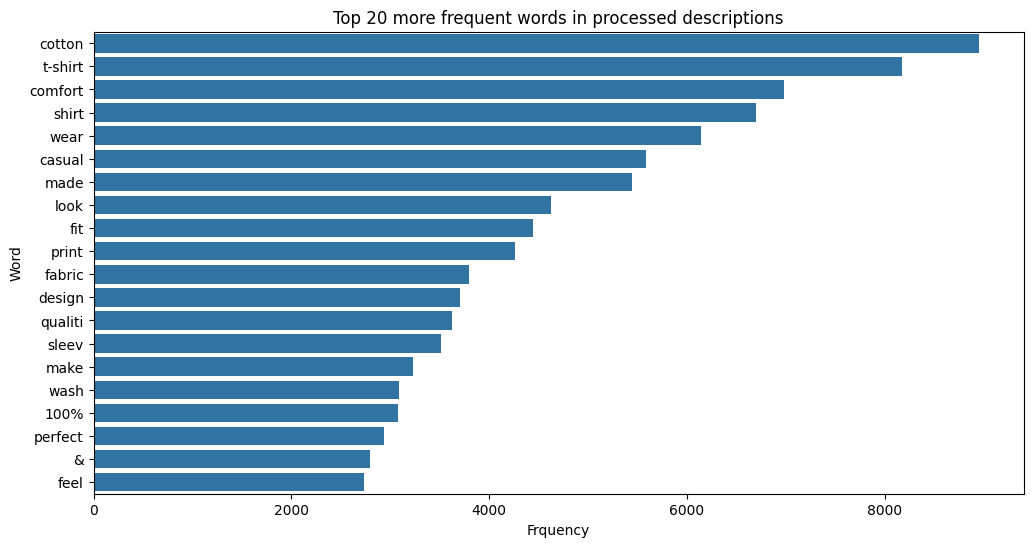

In [149]:
all_words = [word for tokens in products['processed_description'].dropna() for word in tokens]

word_counts = Counter(all_words)

top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 more frequent words in processed descriptions")
plt.xlabel("Frquency")
plt.ylabel("Word")
plt.show()

Average words per description: 29.77


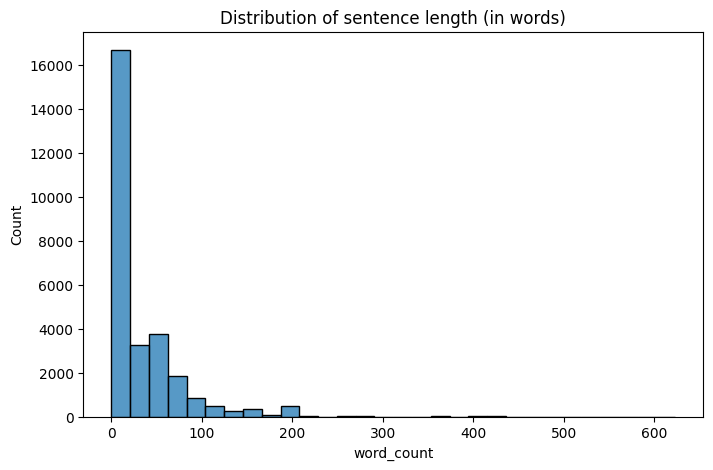

In [150]:
products['word_count'] = products['description'].apply(lambda x: len(str(x).split()))
products['char_count'] = products['description'].apply(lambda x: len(str(x)))
print("Average words per description:", round(products['word_count'].mean(), 2))
    
plt.figure(figsize=(8,5))
sns.histplot(products['word_count'], bins=30)
plt.title('Distribution of sentence length (in words)')
plt.show()


In [151]:
vocabulary_size = len(set(all_words))
print("Vocabulary size:", vocabulary_size)

Vocabulary size: 8827


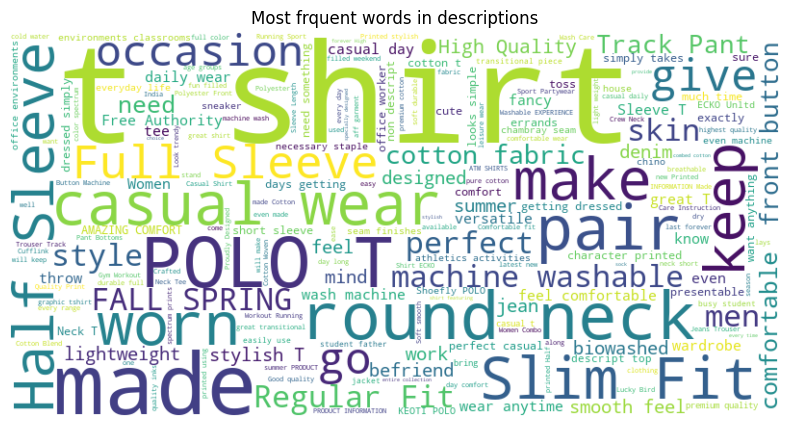

In [152]:
if 'description' in products.columns:
    text = " ".join(products['description'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Most frquent words in descriptions")
    plt.show()

### Ranking of products based on rating

In [153]:
top_rated = products.sort_values(by='average_rating', ascending=False).head(10)
top_rated[['title', 'brand', 'average_rating', 'selling_price']]

,title,brand,average_rating,selling_price
5954,Women Regular Fit Solid Button Down Collar For...,MILD,5,563.0
17399,Women Regular Fit Solid Spread Collar Collar F...,Rose We,5,399.0
4220,Women Slim Fit Solid Casual Shirt,FOREVER YOU,5,725.0
17542,Women Solid Mid-Calf/Crew (Pack of 10),Cots,5,475.0
23909,Printed Men Round Neck Red T-Shirt,Free Authori,5,519.0
23906,Printed Men Round Neck Yellow T-Shirt,Free Authori,5,454.0
11309,Full Sleeve Solid Women Jacket,ECKO Unl,5,1874.0
4354,Solid Men Polo Neck Multicolor T-Shirt (Pack ...,Shoef,5,616.0
4357,Solid Men Polo Neck Multicolor T-Shirt (Pack ...,Shoef,5,806.0
23852,Graphic Print Men Round Neck Blue T-Shirt,Free Authori,5,519.0


### Distributions

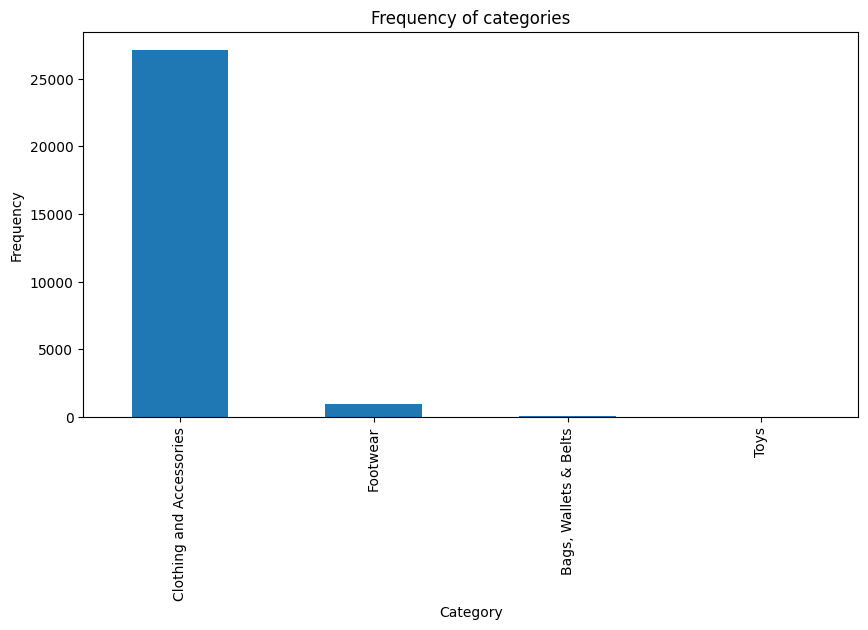

In [154]:
plt.figure(figsize=(10,5))
products['category'].value_counts().plot(kind='bar')
plt.title('Frequency of categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

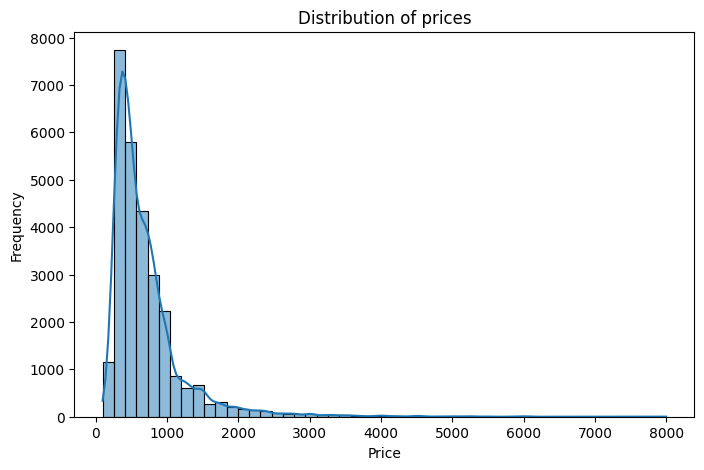

Average price: 705.64


In [155]:
plt.figure(figsize=(8,5))
sns.histplot(products['selling_price'], bins=50, kde=True)
plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print("Average price:", round(products['selling_price'].mean(), 2))


In [157]:
top_discount = products.sort_values(by='discount', ascending=False).head(10)
top_discount[['title', 'brand', 'discount', 'selling_price']]


,title,brand,discount,selling_price
906,Printed Women Round Neck White T-Shirt,Jack Roy,87.0,128.0
903,Printed Women Round Neck White T-Shirt,Jack Roy,86.0,136.0
902,Printed Women Round Neck Grey T-Shirt,Jack Roy,86.0,136.0
18249,Printed Men Round Neck Multicolor T-Shirt (Pa...,yellowvib,85.0,449.0
9811,Solid Balclava Cap,Gracew,84.0,228.0
18016,Printed Women Round Neck Blue T-Shirt,yellowvib,84.0,280.0
18017,Printed Men Mandarin Collar Blue T-Shirt,yellowvib,84.0,282.0
18093,Printed Men Collared Neck Multicolor T-Shirt,yellowvib,84.0,230.0
91,nu-Lite Satin Tie & Cufflink (Red),,84.0,499.0
3102,Color Block Women Round Neck Green T-Shirt,REF,84.0,228.0


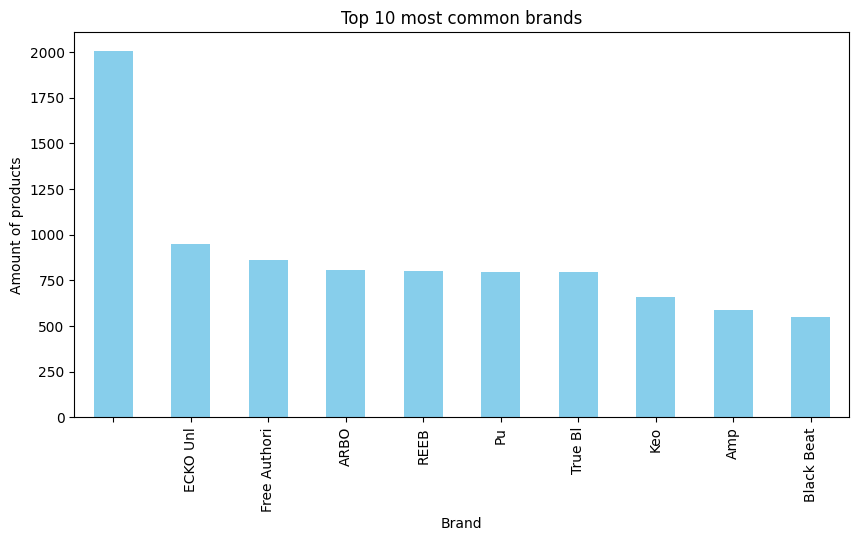

In [158]:
plt.figure(figsize=(10,5))
products['brand'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 most common brands')
plt.xlabel('Brand')
plt.ylabel('Amount of products')
plt.show()


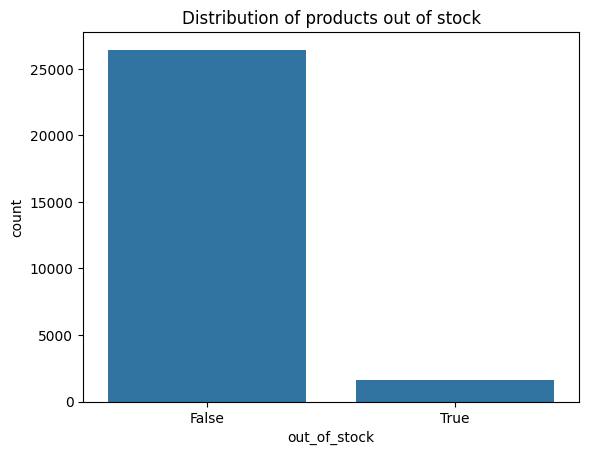

In [159]:
if 'out_of_stock' in products.columns:
    sns.countplot(data=products, x='out_of_stock')
    plt.title('Distribution of products out of stock')
    plt.show()
